# Telecom Customer Churn Prediction: Case Study Problem Statement

## Introduction

The telecom industry is highly competitive, and customer churn is a significant concern. Retaining existing customers is often more cost-effective than acquiring new ones. This case study aims to build a predictive model to identify customers who are likely to churn, allowing the company to take proactive measures to retain them.

# Objective

The primary objective is to develop a machine learning model that can predict customer churn with high accuracy. The model will use historical data to identify patterns or characteristics of customers who have churned in the past.

## Data

Two datasets are provided:

1. `train.csv`: This dataset contains historical data, including whether or not a customer has churned. Features include customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, and Churn.

2. `active_customers.csv`: This dataset contains data for active customers without the 'Churn' label. The objective is to predict the likelihood of these active customers churning in the near future.

# Data Exploration
Python is a popular programming language for data analysis, thanks to its rich ecosystem of libraries. In this report, extensive use the capabilities of four fundamental libraries: Pandas, NumPy, Matplotlib, and Seaborn has been done.

1. Starting by performing initial data exploration to understand the data types, missing values, and summary statistics.
2. And then visualizing the data to identify patterns and correlations.


In [589]:
import pandas as pd
# Pandas is a powerful library for data manipulation and analysis. 
# It provides data structures like DataFrames and Series, making it easy to load, clean, and manipulate data. 
import numpy as np
# NumPy is the foundation of numerical computing in Python. 
# It introduces powerful arrays that allow for efficient mathematical operations on large datasets
import matplotlib.pyplot as plt
# Matplotlib is the go-to library for creating static, animated, or interactive plots and charts.
import seaborn as sns
# Seaborn is built on top of Matplotlib and provides a higher-level interface for creating statistical data visualizations.

In [590]:
df = pd.read_csv('train.csv')
# This line uses the read_csv function from the Pandas library to read the data from the 'train.csv' file and convert it into a DataFrame 'df'.

In [591]:
df.head()
# The df.head() command is used to display the first few rows of the DataFrame 'df.' 
# It is a common operation to quickly inspect the data and get an initial sense of its structure.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,1


In [592]:
df.info()
# The df.info() method provides a summary of essential information about the DataFrame 'df'. 
# It includes details about the DataFrame's structure, the data types of its columns, and the number of non-null (non-missing) values in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [593]:
for column in df.columns :
    if df[column].dtype=='object' :
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(normalize=True).sort_values())
        print('\n')
# The provided code conducts a categorical column analysis within a Pandas DataFrame 'df.'
# This summary facilitates the understanding of the diversity and distribution of categorical data, aiding data exploration and quality assessment.

CUSTOMERID :  5282
customerID
3704-IEAXF    0.000189
3758-CKOQL    0.000189
8064-RAVOH    0.000189
2080-SRCDE    0.000189
7996-MHXLW    0.000189
                ...   
3594-BDSOA    0.000189
9068-FHQHD    0.000189
1334-FJSVR    0.000189
6143-JQKEA    0.000189
6490-FGZAT    0.000189
Name: proportion, Length: 5282, dtype: float64


GENDER :  2
gender
Female    0.496971
Male      0.503029
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.479553
No     0.520447
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.297047
No     0.702953
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.100341
Yes    0.899659
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.100341
Yes                 0.422757
No                  0.476903
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No             0.216395
DSL            0.343809
Fiber optic    0.439796
Name: proportion, dtype: float64

In [594]:
df.describe()
# The df.describe() method in Pandas generates a statistical summary of the numerical columns in the DataFrame 'df'. 

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.162060,32.362931,64.856626,0.265430
std,0.368541,24.627623,30.171934,0.441604
min,0.000000,0.000000,18.400000,0.000000
25%,0.000000,9.000000,35.450000,0.000000
50%,0.000000,29.000000,70.500000,0.000000
75%,0.000000,55.750000,89.987500,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [595]:
# we'll be changing the data of churn into Yes and No, because essentially its a boolean data
df['Churn']=df['Churn'].replace({0:'No',1:'Yes'})

In [596]:
# we'll be changing the data of senior citizen into Yes and No, because essentially its a boolean data
df['SeniorCitizen']=df['SeniorCitizen'].replace({0:'No',1:'Yes'})

In [597]:
df.isnull().sum()
# The code is used to count the number of missing (null) values in each column of 'df'. 
# It's a quick way to identify how many missing values exist in each column.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

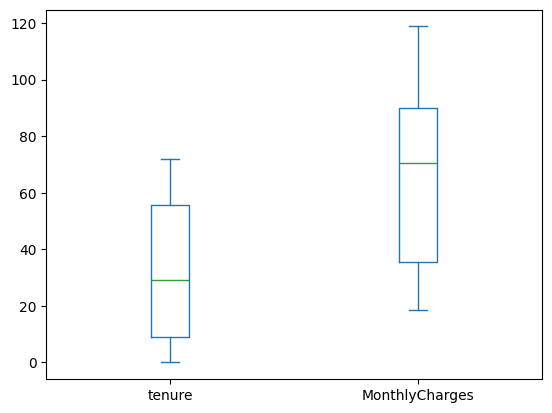

In [598]:
df[['tenure','MonthlyCharges']].plot.box()
# A box plot, also known as a box-and-whisker plot, provides a visual representation of the distribution and summary statistics of a dataset.
# Each box plot consists of a box (the interquartile range), a line inside the box (the median), 
# and "whiskers" extending from the box, which represent the spread of the data.

 As can be seen from the above plots, there are no outliers here for both the continuous data

In [599]:
#From the .head function e remember that Total Charges is also continuous data but it appears as object in the .info() output.
# Hence we'll attempt to convert the data into a continuous one using below code.
df['TotalCharges']=df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [600]:
# ValueError: could not convert string to float: ' '
# We can see there's an error which says can't convert ' ' to float - It means an empty spaced string
#Let's check how many rows have such entries
df[df['TotalCharges']==' ']
#If there aren't many we may drop all the entries rows with single space


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
350,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
583,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
1592,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
4425,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
4747,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4971,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
5028,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
5260,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No


In [601]:
# There are a total of 8 rows which have similiar empty spaced string. It is not very significant as compared to total entries.
# Hence we'll first change those rows into nan(null values) using below code.
df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [602]:
df['TotalCharges']=df['TotalCharges'].astype(float)
# We reattempted to convert the column into float

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   object 
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


And this time TotalCharges got converted to continuous data

In [604]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
#It fills missing values in the 'TotalCharges' column of a DataFrame (presumably named 'df') with the median value of that column.

In [605]:
df.isna().any()
# To check if there are any null (nan) values in any of the columns

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [606]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000
mean,32.362931,64.856626,2294.184864
std,24.627623,30.171934,2283.697366
min,0.000000,18.400000,18.850000
25%,9.000000,35.450000,396.475000
50%,29.000000,70.500000,1387.400000
75%,55.750000,89.987500,3841.637500
max,72.000000,118.750000,8684.800000


<Axes: >

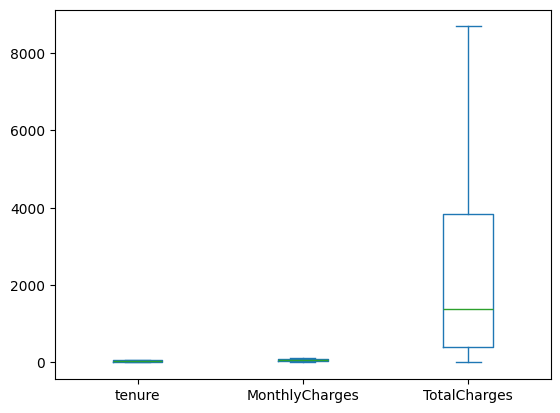

In [607]:
df[['tenure','MonthlyCharges','TotalCharges']].plot.box()

In [608]:
# Checking for number of duplicate rows
dups = df.duplicated()
print('No. of duplicate rows are %d' % (dups.sum()))

No. of duplicate rows are 0


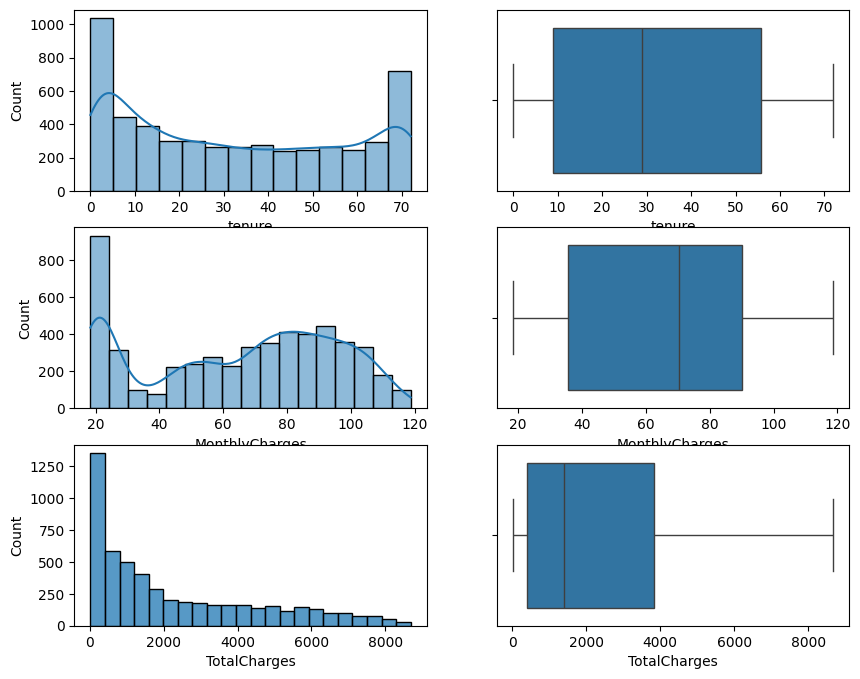

In [609]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
# This code creates a figure with 3rows and 2columns of subplots using Matplotlib.
# Which results in a 3x2 grid of subplots, with a total of 6 subplots. The figure size is set to 10 inches in width and 8 inches in height.
# Plot the histogram and boxplot for 'tenure'

sns.histplot(df['tenure'], kde=True, ax=axes[0][0])
#This code uses Seaborn to create a histogram (and an overlaid kernel density estimate, denoted by kde=True) of the 'tenure' column from 'df'. 
# It specifically plots this histogram in the subplot located at the first row and first column (0,0) of the grid of subplots defined earlier.
# Kernel Density Estimation is a non-parametric way to estimate the probability density function of a continuous random variable.

sns.boxplot(x='tenure', data=df, ax=axes[0][1])
# This code uses Seaborn to create a boxplot for the 'tenure' column from 'df'.
# And places it in the subplot located at the first row and second column (0,1) of the 3x2 grid of subplots defined earlier.

# Plot the histogram and boxplot for 'MonthlyCharges'
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1][0])
sns.boxplot(x='MonthlyCharges', data=df, ax=axes[1][1])

# Plot the histogram and boxplot for 'TotalCharges'
sns.histplot(df['TotalCharges'], kde=False, ax=axes[2][0])
sns.boxplot(x='TotalCharges', data=df, ax=axes[2][1])

# Show the plots
plt.show()

 Clearly no outliers

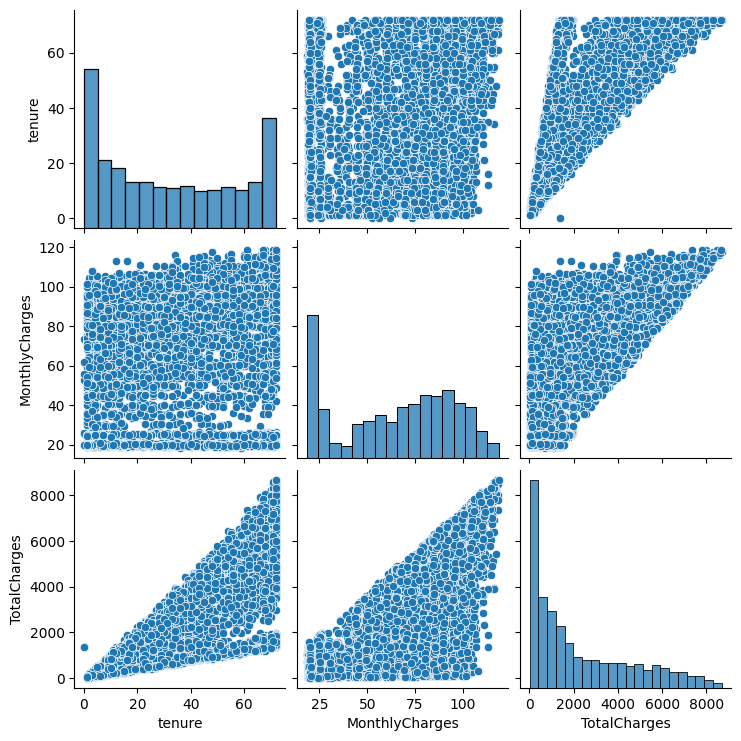

In [610]:
sns.pairplot(df)
# The code sns.pairplot(df) uses Seaborn to create a pairplot, which is a grid of scatterplots and histograms. 
# It displays pairwise relationships between numerical columns in'df'.
# It provides us with a visual summary of data distribution and correlations between variables. 

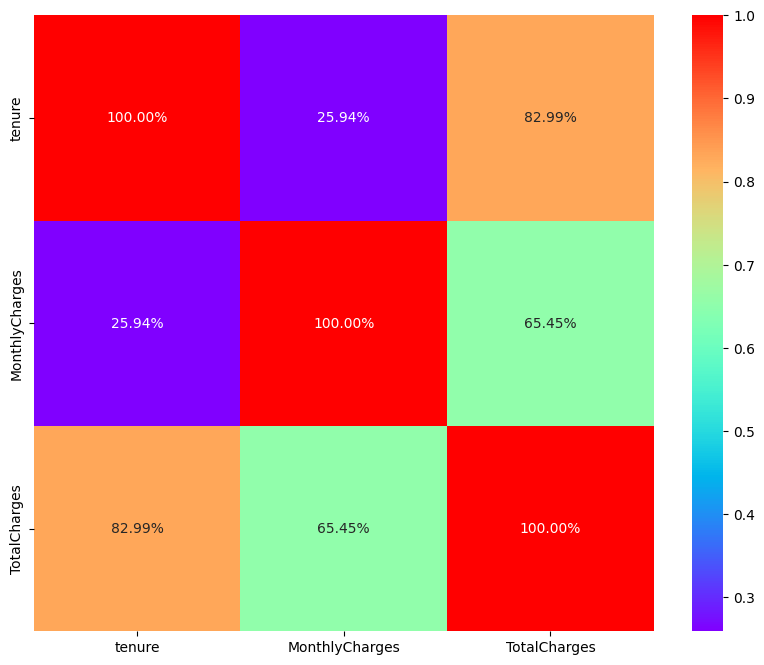

In [611]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2%", cmap="rainbow")
plt.show()
# This code calculates the correlation matrix for numerical columns in 'df,' 
# It creates a heatmap visualization of the correlations with annotations displaying correlation coefficients rounded to two decimal places
# And uses the "rainbow" color map for the heatmap. 
# This is a concise way to visualize the relationships between numeric variables in your dataset.

Correlated features should be considered for removal in machine learning to prevent multicollinearity, reduce model complexity, enhance interpretability, and improve computational efficiency, while considering the trade-off between information loss and domain knowledge.

Generally, a correlation with an absolute value closer to 1 (e.g., 0.7, 0.8, 0.9) is often considered "high". And from the above heatmap Total charges is highly correlated with both MonthlyCharges and tenure.

Hence we'll drop the TotalCharges column before proceeding further.

In [612]:
df = df.drop('TotalCharges', axis=1) 
# axis=1 means column and .drop() is used to drop the column from the dataset

## Data preparation (outlier treatment)

In [613]:
# Here, we'll segragate the numerical and categorical data into individual dataframes.
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)
# This code categorizes the columns in a DataFrame 'df' into two lists: 'cat' for object (categorical) columns and 'num' for numerical columns.

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['tenure', 'MonthlyCharges']


In [614]:
# Now, we'll check for skewness and kurtosid which must lie between -1 and 1
print('The skewness for tenure is ',df['tenure'].skew())
print('The skewness for Monthly Charges is ',df['MonthlyCharges'].skew())
print('The kurtosis for tenure is ',df['tenure'].kurtosis())
print('The kurtosis for Monthly Charges is ',df['MonthlyCharges'].kurtosis())

The skewness for tenure is  0.2441461900617672
The skewness for Monthly Charges is  -0.21898590678069507
The kurtosis for tenure is  -1.3880374634662875
The kurtosis for Monthly Charges is  -1.2642974149498787


In the context of skewness values, a lower skewness value is generally considered better because it indicates a distribution that is closer to being symmetric.

A skewness value of 0 represents a perfectly symmetrical distribution.
Positive skewness (greater than 0) suggests a right-skewed distribution, where the tail is longer on the right side.
Negative skewness (less than 0) indicates a left-skewed distribution, where the tail is longer on the left side.our casefirst skewness value for 'tenure' is 0.2441, indicating a distribution that is only slightly right-s and that of 'MonthlyCharges' is -0,2189 which is slightly left skewed.

In the context of kurtosis values, it's typically better to have a kurtosis value that is closer to 3, which is the kurtosis of a normal distribution (mesokurtic).

A kurtosis value of 3 represents a normal distribution.
Excess kurtosis (kurtosis value greater than 3) indicates heavy tails and a more peaked distribution (leptokurtic).
Negative excess kurtosis (kurtosis value less than 3) suggests lighter tails and a flatter distribution (platykurt

Generally scale transformation is used to increase kurtosis but it impacts the skewness which is just fine for our case. Hence we'll not transform the data any further.ic).rios.

# One Hot Encoding

One-hot encoding is a technique used to represent categorical data (data that has discrete categories or labels) as binary vectors (dummies) in machine learning and data analysis. It's a way to convert categorical data into a format that can be used by various machine learning algorithms, which typically work with numerical data.

In [615]:
# We'll drop the customer id column before creating dummies because dummies are not needed for data analysis and prediction.
df=df.drop('customerID', axis=1)

In [616]:
df.describe(include='all')
# The above code generates a comprehensive summary of statistics for 'df,' covering both numerical and categorical columns.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,5282,5282,5282,5282,5282.000000,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282.000000,5282
unique,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,2
top,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,No
freq,2657,4426,2749,3713,NaN,4752,2519,2323,2618,2300,2305,2585,2076,2077,2907,3132,1772,NaN,3880
mean,NaN,NaN,NaN,NaN,32.362931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.856626,NaN
std,NaN,NaN,NaN,NaN,24.627623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.171934,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.450000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.500000,NaN
75%,NaN,NaN,NaN,NaN,55.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.987500,NaN


In [617]:
for column in df.columns :
    if df[column].dtype=='object' :
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(normalize=True).sort_values())
        print('\n')

# Rechecking the summarized data before generating dummies

GENDER :  2
gender
Female    0.496971
Male      0.503029
Name: proportion, dtype: float64


SENIORCITIZEN :  2
SeniorCitizen
Yes    0.16206
No     0.83794
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.479553
No     0.520447
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.297047
No     0.702953
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.100341
Yes    0.899659
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.100341
Yes                 0.422757
No                  0.476903
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No             0.216395
DSL            0.343809
Fiber optic    0.439796
Name: proportion, dtype: float64


ONLINESECURITY :  3
OnlineSecurity
No internet service    0.216395
Yes                    0.287959
No                     0.495646
Name: proportion, dtype: float64


ONLINEBACKUP :  3
OnlineBackup
No internet service    0.216395
Ye

In [618]:
# Also we'll now get dummies 
df = pd.get_dummies(df,drop_first=True)

The code is used to perform one-hot encoding on the DataFrame 'df' and is commonly used in preparing categorical data for machine learning. When drop_first=True, it drops the first category in each categorical column, which helps avoid multicollinearity issues in regression-based models.

This transformation replaces the original categorical columns with binary columns representing the presence or absence of each category, making the data suitable for many machine learning algorithms that require numerical input.

In [619]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 5282 non-null   int64  
 1   MonthlyCharges                         5282 non-null   float64
 2   gender_Male                            5282 non-null   bool   
 3   SeniorCitizen_Yes                      5282 non-null   bool   
 4   Partner_Yes                            5282 non-null   bool   
 5   Dependents_Yes                         5282 non-null   bool   
 6   PhoneService_Yes                       5282 non-null   bool   
 7   MultipleLines_No phone service         5282 non-null   bool   
 8   MultipleLines_Yes                      5282 non-null   bool   
 9   InternetService_Fiber optic            5282 non-null   bool   
 10  InternetService_No                     5282 non-null   bool   
 11  Onli

,tenure,MonthlyCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,72,53.65,False,False,True,True,False,True,False,False,...,True,False,True,False,True,False,True,False,False,False
1,4,46.00,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
2,56,21.20,True,False,False,True,True,False,False,False,...,False,True,False,True,False,True,False,False,True,False
3,56,94.45,True,False,False,False,True,False,True,True,...,False,False,True,False,False,True,False,True,False,True
4,9,79.55,False,False,False,False,True,False,False,True,...,False,False,True,False,False,True,False,True,False,True


In [620]:
df.to_csv('need_only_data.csv', index = False)
# To export our datset to another csv file

# Logistic Regression
Logistic regression is a statistical and machine learning technique used for binary classification tasks, where the goal is to predict the probability of an observation belonging to one of two classes. It's named "logistic" because it uses the logistic function (also known as the sigmoid function) to model the probability.

Here are the key points about logistic regression:

Binary Classification: Logistic regression is primarily used for binary classification problems, where the target variable can take one of two values, such as 0 or 1, Yes or No, True or False, etc.

Sigmoid Function: Logistic regression models the relationship between the independent variables (features) and the binary outcome using the sigmoid function. The sigmoid function maps any real-valued number to a value between 0 and 1, representing the probability of the positive class.

Model Parameters: In logistic regression, you estimate model parameters (coefficients) that describe how the features affect the log-odds of the target variable. The log-odds are then transformed into probabilities using the sigmoid function.

Training: Model parameters are typically estimated through a process called "maximum likelihood estimation." The model is trained on a labeled dataset, and the parameters are adjusted to maximize the likelihood of observing the actual target values given the

Evaluation: Common evaluation metrics for logistic regression include accuracy, precision, recall, F1-score, and the area under the receiver operating characteristic curve (ROC AUC).

Applications: Logistic regression is widely used in various fields, including medical diagnosis, credit scoring, spam detection, and many other binary classification tasks. features.

# Training & testing data using Logistic Regression

In [621]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_test_split: This function is used for splitting a dataset into training and testing subsets. It's essential for evaluating machine learning models' performance.

LogisticRegression: This class from scikit-learn provides tools for fitting logistic regression models to your data. It's particularly useful for binary classification tasks

In [622]:
y = df['Churn_Yes']
X = df.drop(['Churn_Yes'], axis=1)
# THe above codeis used to prepare data for a typical supervised machine learning task. 
# It separates the target variable ('y') from the feature variables ('X') in 'df' to facilitate model training and prediction. 
#'y' - Churn_Yes represents the outcome to predict, while 'X' contains the input features used to make predictions. 

In [623]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=50,stratify=y)

The above code uses the train_test_split function to split the dataset into training and testing sets for a machine learning task:

X_train: Contains the feature variables for the training set.

X_test: Contains the feature variables for the testing set.

y_train: Contains the target variable for the training set.

y_test: Contains the target variable for the testing set.

The parameters used are:
X and y: The feature and target variables from the dataset.

test_size=0.5: Specifies that 50% of the data will be used for testing, while 50% will be used for training.

random_state=111: Sets the random seed for reproducibility.

stratify=y: Ensures that the class distribution in the target variable 'y' is preserved in both the training and testing sets. This is important for maintaining a representative sample of each class in the data.


This code prepares the data for model training and evaluation by splitting it into training and testing subsets. The training set is used to train the model, and the testing set is used to assess its performance.performance.

In [624]:
# Creating Instance - initializing
model = LogisticRegression(max_iter=10000)
# 'max_iter=10000' sets the maximum number of iterations (or optimization steps) for the logistic regression algorithm to converge to a solution.

In [625]:
# fit instance for training data
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

model: This is the logistic regression model instance you created earlier.

.fit(): This method is used to train the model by fitting it to the training data.

X_train: This is the feature matrix containing the training data, which the model uses to learn the relationships between the features and the target variable.

y_train: This is the target variable (the labels) for the training data, which the model learns to predict.

After this code is executed, the logistic regression model is trained and ready to make predictions based on the relationships it has learned from the training data. It's now capable of classifying new, unseen data points based on the patterns it identified during training.ing.

In [626]:
model.intercept_
# The model.intercept_ attribute provides the intercept (bias or constant) term of the logistic regression model.

array([-0.36866303])

In [627]:
model.coef_
# The model.coef_ attribute provides the coefficients (weights) associated with each feature in the logistic regression model. 
# These coefficients determine the impact of each feature on the prediction of the target variable.

array([[-0.03876611, -0.00167779, -0.10041354,  0.20332501, -0.09157308,
        -0.1516772 , -0.24592299,  0.24276901,  0.32908442,  1.05977675,
        -0.15339139, -0.15339139, -0.32862958, -0.15339139,  0.05498275,
        -0.15339139, -0.06207127, -0.15339139, -0.34629851, -0.15339139,
         0.26457552, -0.15339139,  0.35736179, -0.60451678, -1.17948449,
         0.34173929, -0.17071688,  0.32495945,  0.16704047]])

In [628]:
Prediction_test = model.predict(X_test)

.predict(): This is a method that applies the trained model to make predictions based on the input data.

X_test: This is the feature matrix containing the testing data, and you want to predict the target variable for these test cases.

After executing this code, the Prediction_test variable will contain the predicted binary class labels (0 or 1) for the test data based on the logistic regression model's learned relationships between the features and the target variable

In [629]:
Prediction_test

array([False, False, False, ..., False,  True,  True])

In [630]:
Prediction_train = model.predict(X_train)

In [631]:
Prediction_train

array([False,  True,  True, ..., False, False, False])

In [632]:
#To check the performance

# Recall value is the success rate over the binary value of 1 - or yes, this different from accuracy
# Selecting the right sample if of utmost importance for binary prediction
from sklearn.metrics import classification_report
print('\nClassification report of test data')
print(classification_report(y_test,Prediction_test))
from sklearn.metrics import confusion_matrix
print('\nConfusion matrix for test data')
print(confusion_matrix(y_test, Prediction_test))
print('\nClassification report of train data')
print(classification_report(y_train,Prediction_train))
print('\nConfusion matrix for train data')
print(confusion_matrix(y_train, Prediction_train))


Classification report of test data
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1940
        True       0.66      0.54      0.60       701

    accuracy                           0.80      2641
   macro avg       0.75      0.72      0.73      2641
weighted avg       0.80      0.80      0.80      2641


Confusion matrix for test data
[[1742  198]
 [ 320  381]]

Classification report of train data
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1940
        True       0.66      0.56      0.61       701

    accuracy                           0.81      2641
   macro avg       0.76      0.73      0.74      2641
weighted avg       0.80      0.81      0.80      2641


Confusion matrix for train data
[[1741  199]
 [ 307  394]]


classification_report( , ): This function generates a detailed classification report that includes metrics such as precision, recall, F1-score, and support for each class in the classification problem. It compares the true labels (y_test) to the predicted labels (Prediction_test) and calculates various performance measures.

The classification report provides insights into how well the logistic regression model performed on the test data, including measures of precision, recall, and overall accuracy for each class. 

confusion_matrix( , ): This function calculates a confusion matrix by comparing the true class labels (say y_train) with the predicted class labels (Prediction_train) based on the model's training data. 

The confusion matrix breaks down the number of true positives, true negatives, false positives, and false negatives, providing insights into the model's performance in terms of classification accuracy and errors.. 

# Decision Trees
A decision tree is a machine learning algorithm used for both classification and regression tasks. It's a tree-like structure that recursively splits the dataset into subsets based on the most significant feature at each node. Here's a short summary of decision trees:

Tree Structure: Decision trees consist of nodes representing features, edges representing decisions, and leaves representing predicted outcomes.

Splitting Criteria: At each node, the algorithm selects the feature that best separates the data, typically using metrics like Gini impurity or information gain (for classification) or mean squared error (for regression).

Recursive Process: The tree is grown recursively until a stopping criterion is met, such as reaching a maximum depth or having too few data points in a node.

Predictions: To make predictions, you start at the root node and follow the path through the tree based on feature values until you reach a leaf node, which provides the predicted class or value.

Interpretability: Decision trees are interpretable, as you can visualize the tree and understand the decision-making process.

Decision trees are widely used in various applications, from classification tasks like spam detection to regression tasks like predicting house prices. g process.

# Training & testing data using Decision trees

In [633]:
#Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Intitializing decision tree
dt_model = DecisionTreeClassifier(criterion='gini')

In [634]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [635]:
#To visualize the decision tree 
#from sklearn import tree
#train_char_label = ['No','Yes']
#Id_tree_file = open('Id_tree_file.dot','w')
#dot_data = tree.export_graphviz(dt_model,
#                               out_file=Id_tree_file,
 #                              feature_names = list(X_train),
  #                             class_names = list(train_char_label))
#Id_tree_file.close()

In [636]:
pd.DataFrame(dt_model.feature_importances_,columns=['Importance'],index=X_train.columns).sort_values('Importance',ascending=False)

,Importance
tenure,0.291266
MonthlyCharges,0.271566
InternetService_Fiber optic,0.106922
SeniorCitizen_Yes,0.026987
OnlineSecurity_Yes,0.025608
PaymentMethod_Electronic check,0.025379
Partner_Yes,0.023704
PaymentMethod_Credit card (automatic),0.023157
PaperlessBilling_Yes,0.022819
TechSupport_Yes,0.020565


pd.DataFrame(): This pandas function creates a DataFrame, which is a structured data table.

dt_model.feature_importances_: This attribute of the decision tree model provides an array of feature importances.

columns=['Importance']: Specifies the name of the column in the DataFrame, which is set to 'Importance' to represent feature importances.

index=X_train.columns: Sets the DataFrame's index to the column names of the training feature matrix (X_train).

.sort_values('Imp', ascending=False): Sorts the DataFrame by the 'Importance' column in descending order, placing the most important features at the top.

The resulting DataFrame provides a clear view of the feature importances, allowing you to identify which features had the most influence on the model's decisions. ons. 

In [637]:
#Predictions
# On training data
y_pred_train = dt_model.predict(X_train)

In [638]:
y_pred_train

array([False,  True,  True, ..., False, False, False])

In [639]:
# On testing data
y_pred_test = dt_model.predict(X_test)

In [640]:
y_pred_test

array([False,  True, False, ...,  True,  True,  True])

In [641]:
print('\nClassification report of training data')
print(classification_report(y_train,y_pred_train))
print('\nConfusion matrix for train data')
print(confusion_matrix(y_train, y_pred_train))
print('\nClassification report of test data')
print(classification_report(y_test,y_pred_test))
print('\nConfusion matrix for test data')
print(confusion_matrix(y_test, y_pred_test))


Classification report of training data
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1940
        True       1.00      1.00      1.00       701

    accuracy                           1.00      2641
   macro avg       1.00      1.00      1.00      2641
weighted avg       1.00      1.00      1.00      2641


Confusion matrix for train data
[[1940    0]
 [   3  698]]

Classification report of test data
              precision    recall  f1-score   support

       False       0.82      0.81      0.82      1940
        True       0.50      0.52      0.51       701

    accuracy                           0.73      2641
   macro avg       0.66      0.66      0.66      2641
weighted avg       0.74      0.73      0.73      2641


Confusion matrix for test data
[[1572  368]
 [ 339  362]]


# Random Forest Method
Random Forest is a popular ensemble machine learning method used for both classification and regression tasks. It's an ensemble of decision trees, which are combined to make more accurate and robust predictions. Here are the key points about the Random Forest method:

Ensemble Learning: Random Forest is an ensemble method that combines the predictions of multiple decision trees to improve overall accuracy and reduce overfitting.

Bagging: It uses a technique called Bootstrap Aggregating (Bagging) to create multiple subsets (bootstrap samples) from the training data. Each subset is used to train a separate decision tree.

Random Feature Selection: For each node in a decision tree, Random Forest randomly selects a subset of features to consider for splitting. This introduces randomness and diversity into the trees.

Voting: In classification tasks, the final prediction is determined by a majority vote from the individual trees. In regression tasks, it's based on the average (mean) of the individual tree predictions.

Applications: Random Forest is used in a wide range of applications, including classification problems like image recognition, spam detection, and medical diagnosis, as well as regression problems like predicting stock prices and real estate values.ictions.

# Training & testing data using Random Forest Method

In [642]:
from sklearn.ensemble import RandomForestClassifier

In [643]:
rdf_model = RandomForestClassifier(n_estimators = 300, max_features=18,random_state=50)

The code creates an instance of the Random Forest classifier with specific settings. Here's a summary of what this code does:

n_estimators=300: This hyperparameter specifies the number of decision trees (estimators) to include in the Random Forest. In this case, it's set to 300 trees.

max_features=30: This hyperparameter controls the maximum number of features to consider at each split when constructing the decision trees. Setting it to 40 means that, at each split, the Random Forest will randomly consider a maximum of 30 features.

random_state=50: This sets the random seed for reproducibility. It ensures that the Random Forest's randomization process is consistent across runs.ss runs.

In [644]:
rdf_model.fit(X_train,y_train)

RandomForestClassifier(max_features=18, n_estimators=300, random_state=50)

In [645]:
y_pred_rdf_train = rdf_model.predict(X_train)

In [646]:
y_pred_rdf_train

array([False,  True,  True, ..., False, False, False])

In [647]:
y_pred_rdf_test = rdf_model.predict(X_test)

In [648]:
y_pred_rdf_test

array([False, False, False, ..., False,  True,  True])

In [649]:
print('\nClassification report of training data')
print(classification_report(y_train,y_pred_rdf_train))
print('\nConfusion matrix for train data')
print(confusion_matrix(y_train, y_pred_rdf_train))
print('\nClassification report of test data')
print(classification_report(y_test,y_pred_rdf_test))
print('\nConfusion matrix for test data')
print(confusion_matrix(y_test, y_pred_rdf_test))


Classification report of training data
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1940
        True       1.00      1.00      1.00       701

    accuracy                           1.00      2641
   macro avg       1.00      1.00      1.00      2641
weighted avg       1.00      1.00      1.00      2641


Confusion matrix for train data
[[1938    2]
 [   1  700]]

Classification report of test data
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1940
        True       0.62      0.51      0.56       701

    accuracy                           0.79      2641
   macro avg       0.73      0.70      0.71      2641
weighted avg       0.78      0.79      0.78      2641


Confusion matrix for test data
[[1722  218]
 [ 346  355]]


# Now we'll proceed to do the feature engineering in the set we have to predict

In [653]:
df1 = pd.read_csv('active_customers.csv')
# We have set the name of our dataset as df1

In [654]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [655]:
for column in df1.columns :
    if df1[column].dtype=='object' :
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts(normalize=True).sort_values())
        print('\n')

CUSTOMERID :  1761
customerID
5343-SGUBI    0.000568
8245-UMPYT    0.000568
5366-OBVMR    0.000568
1187-WILMM    0.000568
0537-QYZZN    0.000568
                ...   
3237-AJGEH    0.000568
4962-CHQPW    0.000568
9755-JHNMN    0.000568
0463-WZZKO    0.000568
6704-UTUKK    0.000568
Name: proportion, Length: 1761, dtype: float64


GENDER :  2
gender
Female    0.490062
Male      0.509938
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.49347
No     0.50653
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.307212
No     0.692788
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.086315
Yes    0.913685
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.086315
Yes                 0.419080
No                  0.494605
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No             0.217490
DSL            0.343555
Fiber optic    0.438955
Name: proportion, dtype: float64



In [656]:
# Replace values in the 'SeniorCitizen' column
df1['SeniorCitizen'] = df1['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [657]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [658]:
df1['TotalCharges']=df1['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [659]:
df1[df1['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
74,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
252,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
814,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [660]:
df1['TotalCharges'].replace(' ', np.nan, inplace=True)

In [661]:
df1['TotalCharges']=df1['TotalCharges'].astype(float)

In [662]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   object 
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [663]:
df1['TotalCharges'].fillna(df1['TotalCharges'].median(), inplace=True)

In [664]:
df1.describe()

,tenure,MonthlyCharges,TotalCharges
count,1761.000000,1761.000000,1761.000000
mean,32.395798,64.476945,2245.118654
std,24.360889,29.849797,2209.308603
min,0.000000,18.250000,18.800000
25%,9.000000,35.800000,419.350000
50%,29.000000,69.950000,1423.500000
75%,55.000000,89.600000,3566.600000
max,72.000000,116.800000,8496.700000


<Axes: >

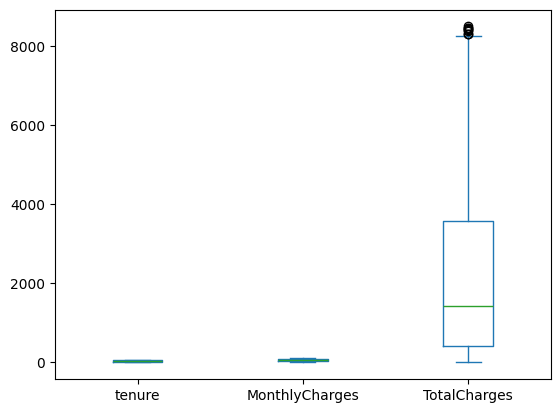

In [665]:
df1[['tenure','MonthlyCharges','TotalCharges']].plot.box()

<Axes: >

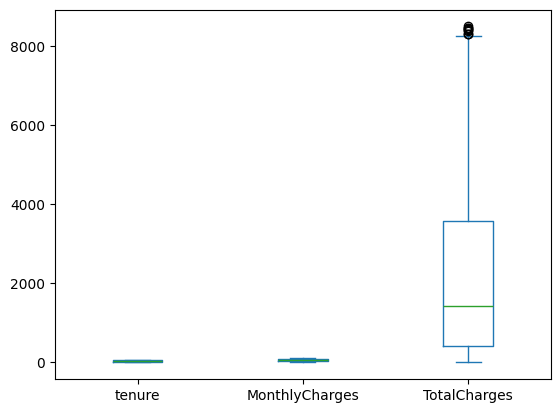

In [666]:
df1[['tenure','MonthlyCharges','TotalCharges']].plot.box()

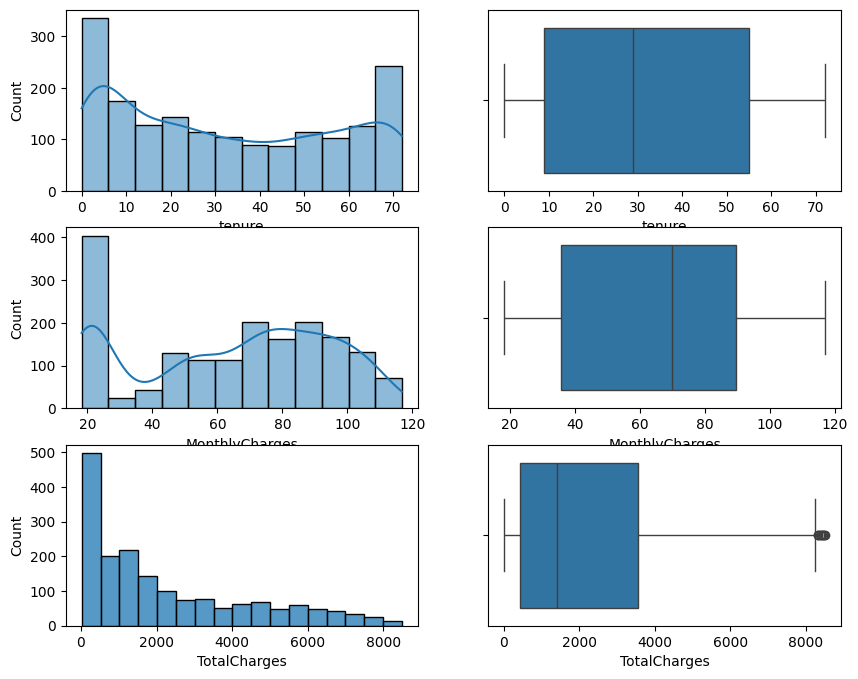

In [667]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Plot the histogram and boxplot for 'tenure'
sns.histplot(df1['tenure'], kde=True, ax=axes[0][0])
sns.boxplot(x='tenure', data=df1, ax=axes[0][1])

# Plot the histogram and boxplot for 'MonthlyCharges'
sns.histplot(df1['MonthlyCharges'], kde=True, ax=axes[1][0])
sns.boxplot(x='MonthlyCharges', data=df1, ax=axes[1][1])

# Plot the histogram and boxplot for 'TotalCharges'
sns.histplot(df1['TotalCharges'], kde=False, ax=axes[2][0])
sns.boxplot(x='TotalCharges', data=df1, ax=axes[2][1])

# Show the plots
plt.show()

In [669]:
# Outlier treatment for total charges is needed
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

The remove_outlier(col) function is designed to identify and return the lower and upper bounds for potential outliers in a given column (col) using the Interquartile Range (IQR) method. Here's a short summary of what this function does:

It sorts the values in the column (col), although the sorting operation should be assigned to the col variable.

It calculates the first quartile (Q1) and the third quartile (Q3) using the np.percentile() function.

It computes the IQR (Interquartile Range) as the difference between Q3 and Q1.

It calculates the lower range as Q1 minus 1.5 times the IQR and the upper range as Q3 plus 1.5 times the IQR.

It returns the lower and upper ranges, which can be used to identify potential outliers in the data. data.

In [670]:
column = 'TotalCharges'  # Replace with your column name
lr, ur = remove_outlier(df1[column])
# The code lr, ur = remove_outlier(df1[column]) applies the remove_outlier function to a specific column (column) in the DataFrame df1 
# And assigns the lower range (lr) and upper range (ur) for potential outliers based on the Interquartile Range (IQR) method.

# Update the column values
df1[column] = np.where(df1[column] > ur, ur, df1[column])
# This code checks if the values in the column are greater than the upper bound (ur). 
# If they are, it replaces those values with the upper bound (ur). This effectively caps the values at the upper bound.
df1[column] = np.where(df1[column] < lr, lr, df1[column])
# Similarly, this code checks if the values in the column are less than the lower bound (lr). 
# If they are, it replaces those values with the lower bound (lr). This caps the values at the lower bound.

<Axes: >

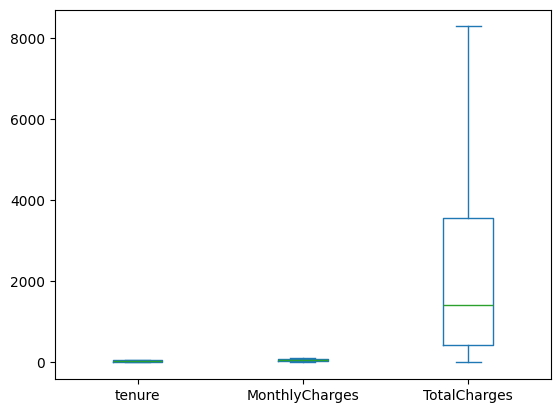

In [671]:
df1[['tenure','MonthlyCharges','TotalCharges']].plot.box()

 No outliers now

In [672]:
# Checking for number of duplicate rows
dups = df1.duplicated()
print('No. of duplicate rows are %d' % (dups.sum()))

No. of duplicate rows are 0


In [673]:
print('The skewness for tenure is ',df1['tenure'].skew())
print('The skewness for Monthly Charges is ',df1['MonthlyCharges'].skew())
print('The skewness for Total Charges is ',df1['TotalCharges'].skew())
print('The kurtosis for tenure is ',df1['tenure'].kurtosis())
print('The kurtosis for Monthly Charges is ',df1['MonthlyCharges'].kurtosis())
print('The kurtosis for Total Charges is ',df1['TotalCharges'].kurtosis())

The skewness for tenure is  0.22548892743603519
The skewness for Monthly Charges is  -0.22612767278769746
The skewness for Total Charges is  0.9905225167096308
The kurtosis for tenure is  -1.386321281506839
The kurtosis for Monthly Charges is  -1.2362616092443022
The kurtosis for Total Charges is  -0.13933434875433592


In [674]:
# There's a scope for transformation here too due to negative kurtosis

In [675]:
seq = df1['customerID']
# So that we concatenate the id with results since the order remains same

In [676]:
df1=df1.drop('customerID', axis=1)

In [677]:
for column in df1.columns :
    if df1[column].dtype=='object' :
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts(normalize=True).sort_values())
        print('\n')

GENDER :  2
gender
Female    0.490062
Male      0.509938
Name: proportion, dtype: float64


SENIORCITIZEN :  2
SeniorCitizen
Yes    0.162408
No     0.837592
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.49347
No     0.50653
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.307212
No     0.692788
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.086315
Yes    0.913685
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.086315
Yes                 0.419080
No                  0.494605
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No             0.217490
DSL            0.343555
Fiber optic    0.438955
Name: proportion, dtype: float64


ONLINESECURITY :  3
OnlineSecurity
No internet service    0.217490
Yes                    0.282794
No                     0.499716
Name: proportion, dtype: float64


ONLINEBACKUP :  3
OnlineBackup
No internet service    0.217490
Ye

In [678]:
# No bad data

In [679]:
cat1=[]
num1=[]
for i in df1.columns:
    if df1[i].dtype=='object':
        cat1.append(i)
    else:
        num1.append(i)
print(cat1)
print(num1)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


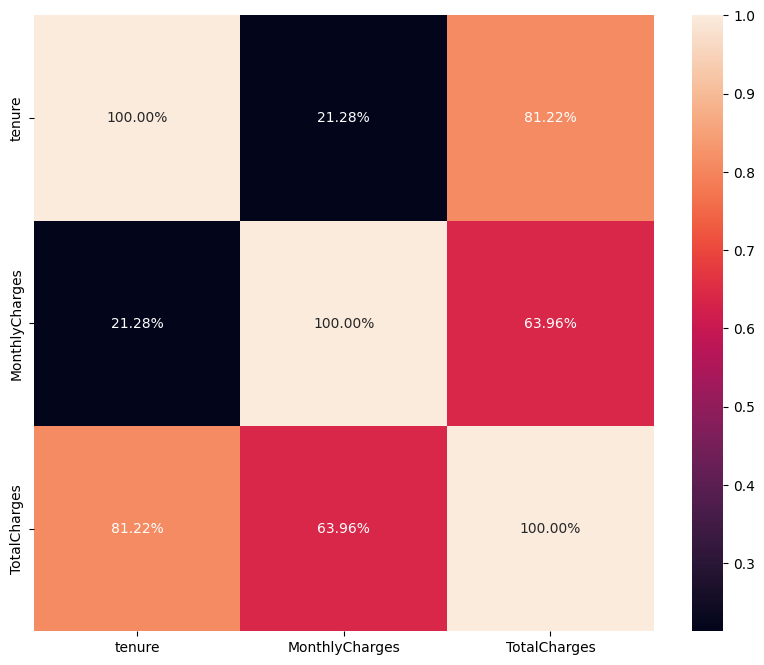

In [680]:
# Create a figure and specify the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a correlation matrix heatmap with annotations and a specific format for the annotations
sns.heatmap(df1[num1].corr(), annot=True, fmt=".2%")

# Show the heatmap
plt.show()

Since TotalCharges is highly correlated with other two parameters we'll drop it for further analysis.

In [681]:
df1=df1.drop('TotalCharges',axis=1)

In [682]:
df1.to_csv('need_only_data1.csv', index = False)
# To export our datset to another csv file

In [683]:
# We'll now get dummies
df1 = pd.get_dummies(df1,drop_first=True)

In [684]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 1761 non-null   int64  
 1   MonthlyCharges                         1761 non-null   float64
 2   gender_Male                            1761 non-null   bool   
 3   SeniorCitizen_Yes                      1761 non-null   bool   
 4   Partner_Yes                            1761 non-null   bool   
 5   Dependents_Yes                         1761 non-null   bool   
 6   PhoneService_Yes                       1761 non-null   bool   
 7   MultipleLines_No phone service         1761 non-null   bool   
 8   MultipleLines_Yes                      1761 non-null   bool   
 9   InternetService_Fiber optic            1761 non-null   bool   
 10  InternetService_No                     1761 non-null   bool   
 11  Onli

# Prediction using Logistic Regression

In [685]:
prediction_LR = model.predict(df1)
for index, prediction in enumerate(prediction_LR):
    print(f"Row {index}: Prediction = {prediction}")


Row 0: Prediction = False
Row 1: Prediction = False
Row 2: Prediction = False
Row 3: Prediction = True
Row 4: Prediction = False
Row 5: Prediction = True
Row 6: Prediction = False
Row 7: Prediction = False
Row 8: Prediction = False
Row 9: Prediction = True
Row 10: Prediction = True
Row 11: Prediction = False
Row 12: Prediction = True
Row 13: Prediction = False
Row 14: Prediction = False
Row 15: Prediction = False
Row 16: Prediction = False
Row 17: Prediction = False
Row 18: Prediction = False
Row 19: Prediction = True
Row 20: Prediction = False
Row 21: Prediction = False
Row 22: Prediction = False
Row 23: Prediction = False
Row 24: Prediction = False
Row 25: Prediction = False
Row 26: Prediction = False
Row 27: Prediction = False
Row 28: Prediction = False
Row 29: Prediction = True
Row 30: Prediction = True
Row 31: Prediction = False
Row 32: Prediction = False
Row 33: Prediction = False
Row 34: Prediction = True
Row 35: Prediction = False
Row 36: Prediction = False
Row 37: Prediction =

# Prediction using Decision Tree Algorithm

In [686]:
prediction_DT = dt_model.predict(df1)
for index, prediction in enumerate(prediction_DT):
    print(f"Row {index}: Prediction = {prediction}")

Row 0: Prediction = False
Row 1: Prediction = False
Row 2: Prediction = False
Row 3: Prediction = True
Row 4: Prediction = False
Row 5: Prediction = False
Row 6: Prediction = False
Row 7: Prediction = False
Row 8: Prediction = True
Row 9: Prediction = False
Row 10: Prediction = True
Row 11: Prediction = False
Row 12: Prediction = True
Row 13: Prediction = False
Row 14: Prediction = False
Row 15: Prediction = True
Row 16: Prediction = True
Row 17: Prediction = False
Row 18: Prediction = False
Row 19: Prediction = False
Row 20: Prediction = True
Row 21: Prediction = False
Row 22: Prediction = False
Row 23: Prediction = False
Row 24: Prediction = False
Row 25: Prediction = True
Row 26: Prediction = False
Row 27: Prediction = False
Row 28: Prediction = False
Row 29: Prediction = False
Row 30: Prediction = False
Row 31: Prediction = True
Row 32: Prediction = False
Row 33: Prediction = False
Row 34: Prediction = True
Row 35: Prediction = False
Row 36: Prediction = False
Row 37: Prediction = 

# Prediction using Random Forest Algorithm

In [687]:
prediction_RDF = rdf_model.predict(df1)
for index, prediction in enumerate(prediction_RDF):
    print(f"Row {index}: Prediction = {prediction}")

Row 0: Prediction = False
Row 1: Prediction = False
Row 2: Prediction = False
Row 3: Prediction = True
Row 4: Prediction = False
Row 5: Prediction = True
Row 6: Prediction = False
Row 7: Prediction = False
Row 8: Prediction = False
Row 9: Prediction = True
Row 10: Prediction = True
Row 11: Prediction = False
Row 12: Prediction = False
Row 13: Prediction = False
Row 14: Prediction = False
Row 15: Prediction = False
Row 16: Prediction = False
Row 17: Prediction = False
Row 18: Prediction = False
Row 19: Prediction = False
Row 20: Prediction = False
Row 21: Prediction = False
Row 22: Prediction = False
Row 23: Prediction = False
Row 24: Prediction = False
Row 25: Prediction = False
Row 26: Prediction = False
Row 27: Prediction = False
Row 28: Prediction = False
Row 29: Prediction = False
Row 30: Prediction = True
Row 31: Prediction = False
Row 32: Prediction = False
Row 33: Prediction = False
Row 34: Prediction = True
Row 35: Prediction = False
Row 36: Prediction = False
Row 37: Predictio

# Combining the data and exporting it 

In [101]:
Fincal_file = []

In [688]:
# Create a DataFrame by combining the lists
Final_file = {'Customer_Id': seq, 'prediction_RDF': prediction_RDF, 'prediction_DT': prediction_DT, 'prediction_LR': prediction_LR}
result_df = pd.DataFrame(Final_file)
# Exporting the DataFrame to a CSV file
result_df.to_csv('result1.csv', index=False)
